Data from the Taiwan Economic Journal for the years 1999–2009 representing company bankruptcy based on the business regulations of the Taiwan Stock Exchange.

## INTRODUCTION

In this kernel we will use various predictive models to see how accurate they are in detecting whether we can correctly predict which comapnies will face bankrptcy in the future. As described in the data section, the dataset contains:

95 features (X1-X95, business regulations of Taiwan Stock Exchange)
1 Vector of labels
Our aim in this project is to use these features to understand their impact/role on the selected models and how they can help us recognizing the companies that are close to bankrupcty. Let's start!

In [137]:
# IMPORTING LIBRARIES

# General Libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from scipy.stats import norm
from random import randint
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [2]:
os.getcwd()

'C:\\Users\\Yesh'

In [3]:
#Getting the data
os.getcwd()
os.chdir('C:\\Users\\Yesh\\OneDrive\\Desktop\\Internship')
bank_data = pd.read_csv("data.csv")
bank_data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


## Data Quality & Missing Value Assessment

Deleting columns which are repeated

<AxesSubplot:>

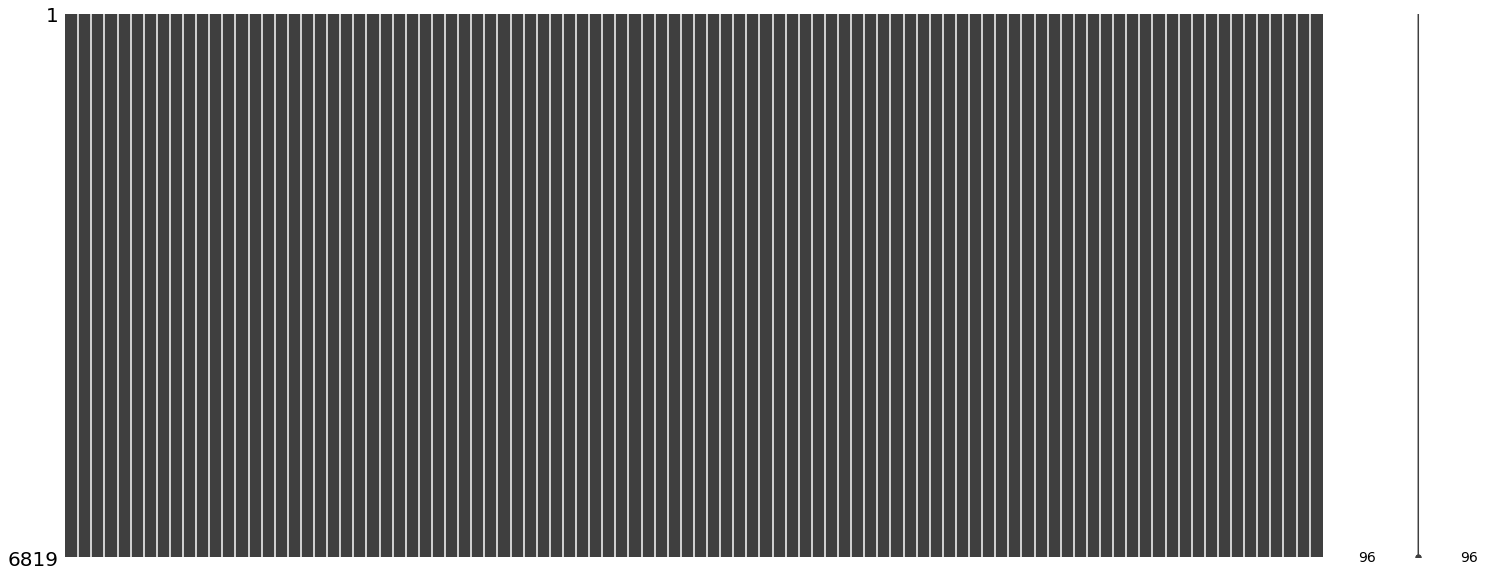

In [4]:
import missingno as mn
mn.matrix(bank_data)

In [5]:
# Checking Nan presence

bank_data.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

It does not contain any missing values so we have got a cleaned data 

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

The resulting panel is strongly informative for us, and it shows how:

The dataset is composed of a combination of 6819 observations per each of our 96 features.
All of the features are numerical (int64 or float64)
There are no missing values (Nan) among the data
Considering that all our features are numeric, we can easily calculate their descriptive statistics: a futher source of information.

The data is already normalized so we dont need to rescale it 

In [ ]:
bank_df = bank_data.copy()

# Finding categorical features

In [8]:
cat_features=[i for i in bank_data.columns if len(bank_data[i].unique() )==2 or len(bank_data[i].unique() )==1]
print(cat_features)

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']


In [133]:
numeric_feat =  bank_df.dtypes[bank_df.dtypes != 'int64'].index

## Handling Outliers

In [10]:
bank_df = bank_df.drop(['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag'], axis=1)

In [11]:
bank_df = bank_df.drop([' Current Liability to Liability', ' Current Liability to Equity', ' Gross Profit to Sales', ' Net worth/Assets'], axis=1)

## Normalizing Data

In [12]:
bank_df=bank_df.apply(zscore)
bank_df = np.abs(bank_df)


In [13]:
bank_df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,2.217909,2.045798,2.400361,0.383334,0.382638,0.016456,0.023516,0.020165,0.087479,0.031281,...,0.206594,2.812493,2.254317,0.049491,0.084274,0.861611,0.680171,0.060031,0.098978,0.622067
1,0.673828,0.311068,0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,0.005957,0.009823,...,0.109511,0.527485,0.309033,0.049491,0.021388,0.029804,0.240685,15.129816,0.364559,0.535573
2,1.303672,0.908420,1.319910,0.383759,0.388177,0.007858,0.061111,0.051183,0.142238,0.086566,...,0.082328,0.199721,0.820510,0.049491,0.005984,0.249820,0.679247,0.062961,0.125015,0.621960
3,1.735886,1.636209,1.556340,1.441418,1.441832,0.004257,0.017313,0.008676,0.024491,0.011077,...,1.018533,1.158899,1.691222,0.049491,0.080226,0.392864,0.093765,0.053903,0.052562,0.471826
4,0.661778,0.307745,0.508050,0.541238,0.540708,0.016758,0.013703,0.016186,0.013254,0.013300,...,0.309818,0.525867,0.316008,0.049491,0.032052,0.029564,0.128014,0.178037,0.776395,0.241715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.189395,0.291959,0.168181,0.206277,0.204969,0.018215,0.017036,0.018197,0.010092,0.016277,...,0.117240,0.115286,0.194231,0.049491,0.024011,0.002968,0.052524,0.030437,0.063215,0.353693
6815,0.494676,0.310237,0.477627,0.569328,0.568828,0.018223,0.017455,0.017919,0.009248,0.016145,...,0.087703,0.001180,0.198659,0.049491,0.001317,0.006633,0.154404,0.033992,0.049970,0.185856
6816,0.534845,0.379194,0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,0.009919,0.013012,...,0.172033,0.776979,0.247517,0.049491,0.019653,0.018166,0.316446,0.047870,0.015101,1.001206
6817,0.017875,0.019594,0.007403,0.005811,0.004720,0.024494,0.024099,0.023223,0.011175,0.022233,...,0.349935,0.278510,0.100366,0.049491,0.003493,0.046934,0.194852,0.045898,0.004270,0.071364


# Identifying and getting features which have a high number of outliers


In [99]:
def outliers_removal(feature,feature_name,dataset):
    
       
    
    outliers = [x for x in feature if  x > 3]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #dataset = dataset.drop(dataset[(dataset[feature_name] > 3) ].index)
    print('-' * 65)
    
    return dataset

for col in bank_df:
    bank_df = outliers_removal(bank_df[col],str(col),bank_df)

Bankrupt? outliers for close to bankruptcy cases: 0
-----------------------------------------------------------------
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 88
-----------------------------------------------------------------
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 110
-----------------------------------------------------------------
 ROA(B) before interest and depreciation after tax outliers for close to bankruptcy cases: 101
-----------------------------------------------------------------
 Operating Gross Margin outliers for close to bankruptcy cases: 63
-----------------------------------------------------------------
 Realized Sales Gross Margin outliers for close to bankruptcy cases: 63
-----------------------------------------------------------------
 Operating Profit Rate outliers for close to bankruptcy cases: 2
-----------------------------------------------------------------
 Pr

# Univariate Analysis

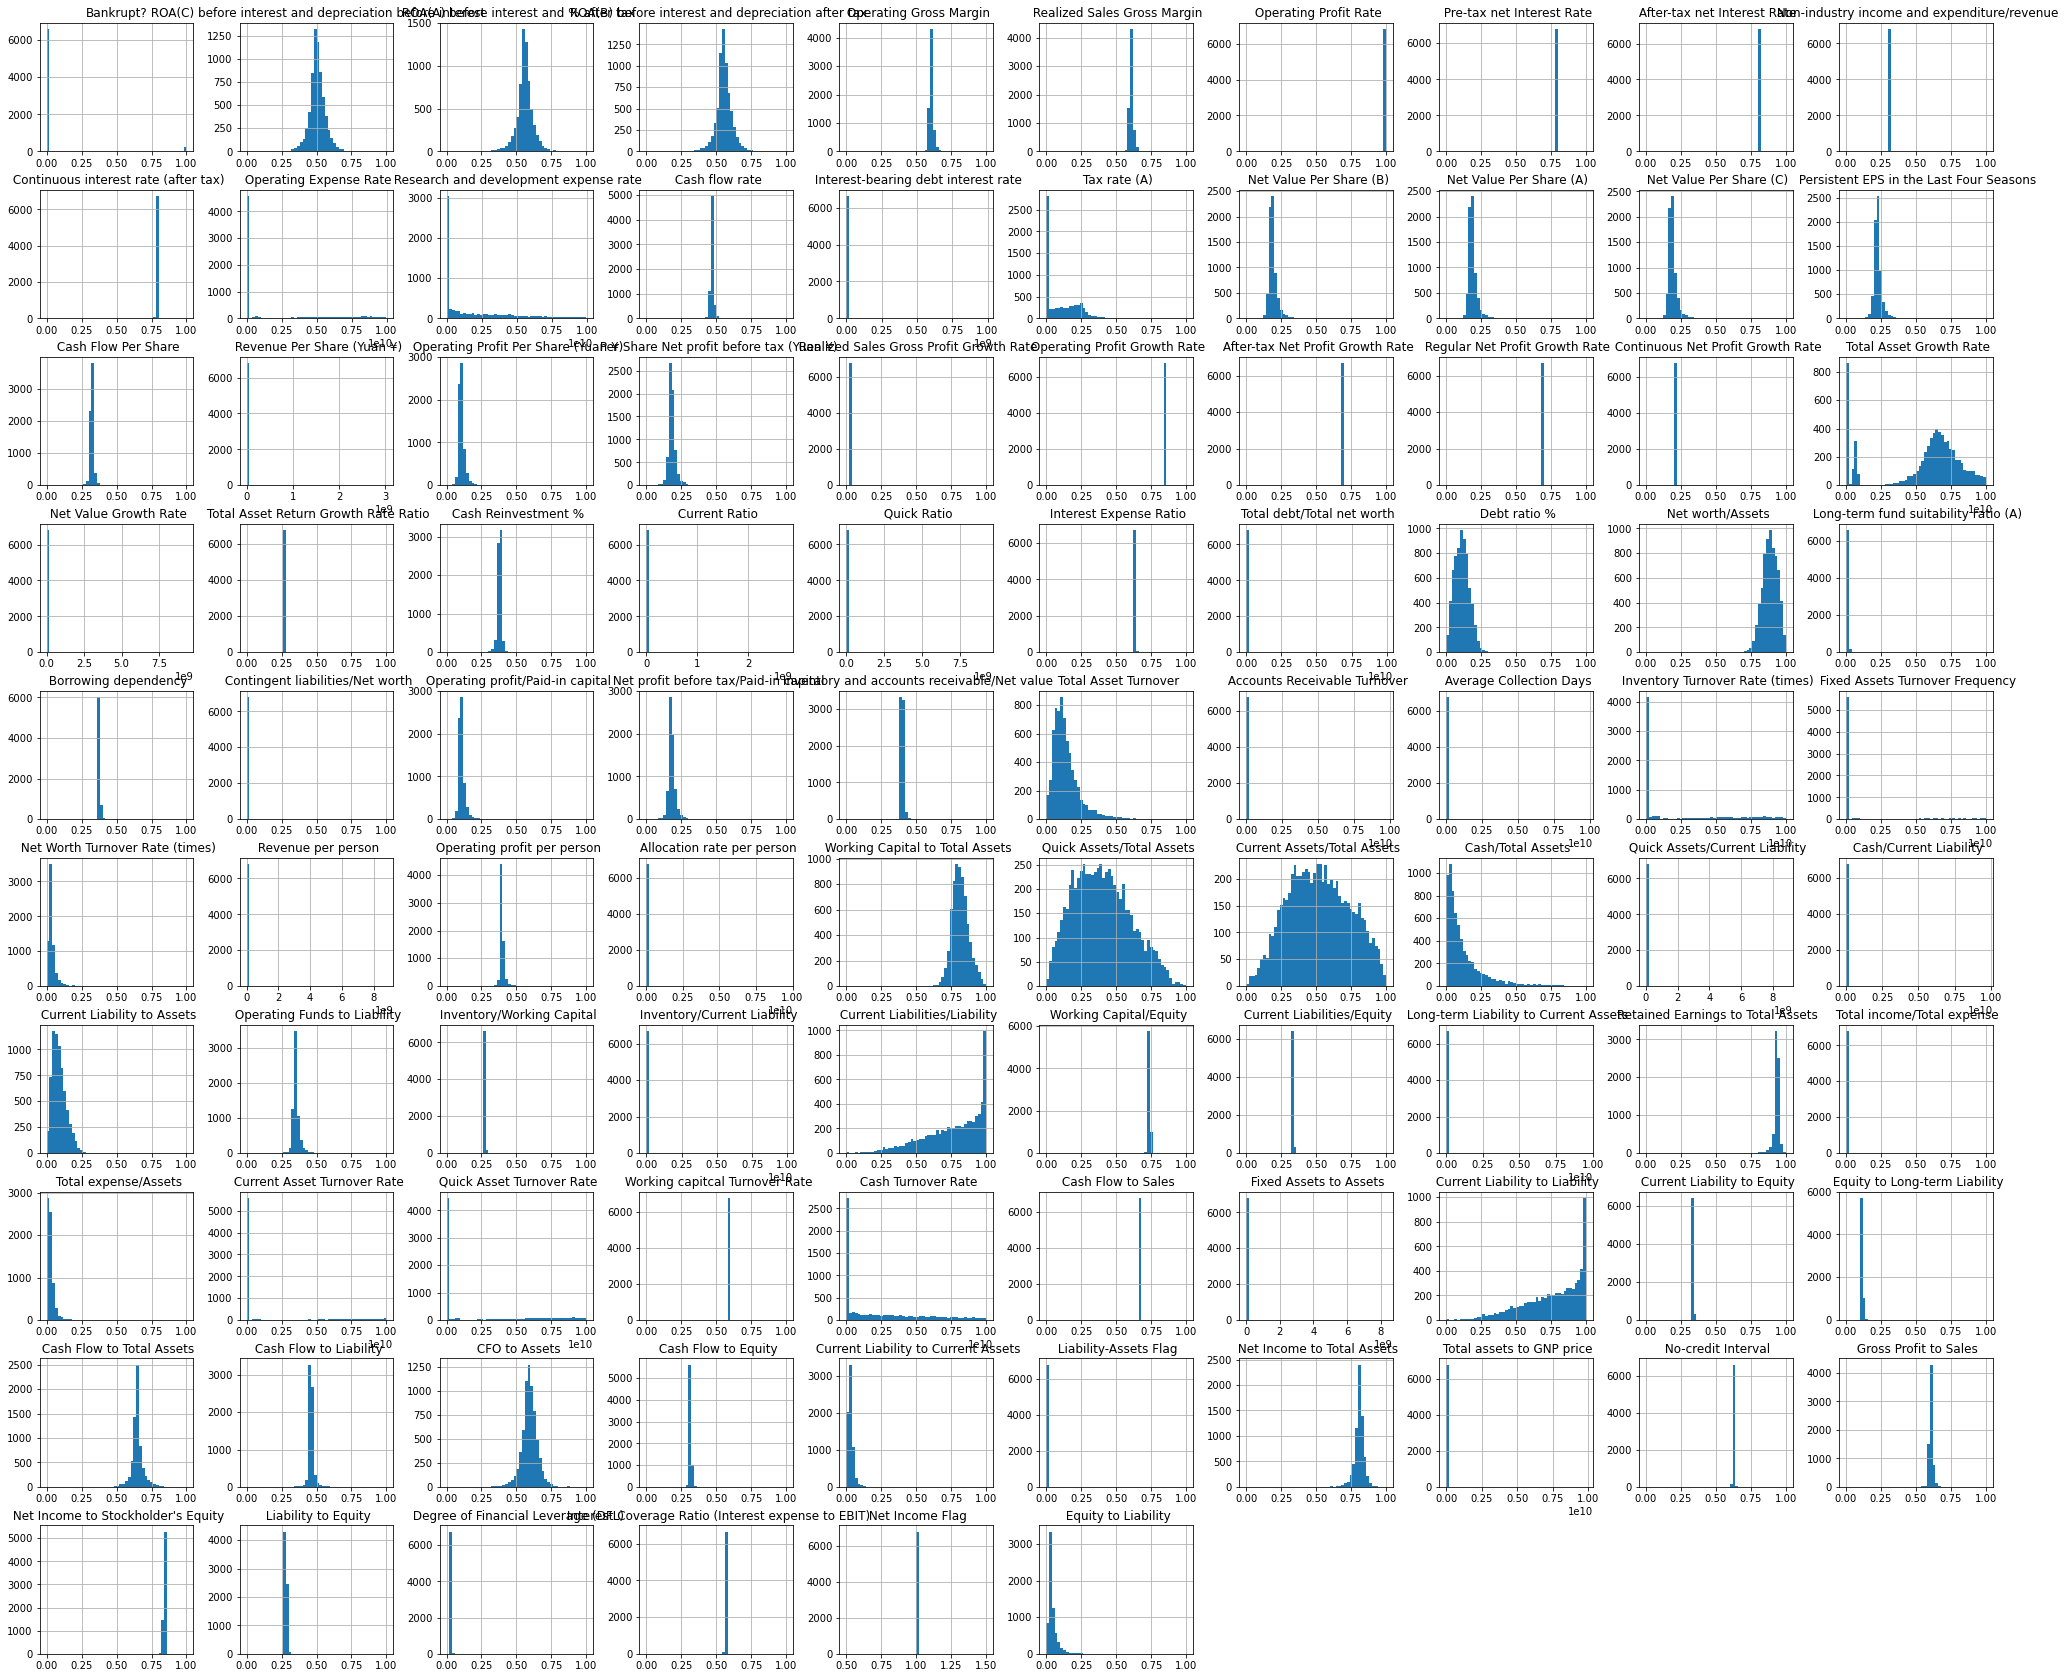

In [92]:
# Looking at the histograms of numerical data

bank_data.hist(figsize = (35,30), bins = 50)
plt.show()

Bankrupt?
0            6599
1             220
dtype: int64


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

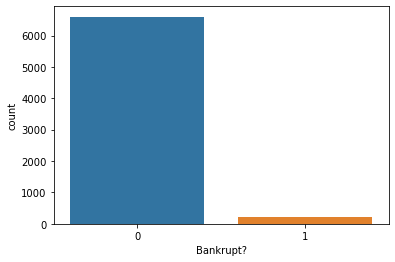

In [114]:
print(bank_df[['Bankrupt?']].value_counts())
sns.countplot(x='Bankrupt?',data=bank_df)

## Observation - 

- The number of organizations that have gone bankrupt in 10 years between 1999 – 2000 is few

## Plotting categorical features 

In [106]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu']

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64


<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

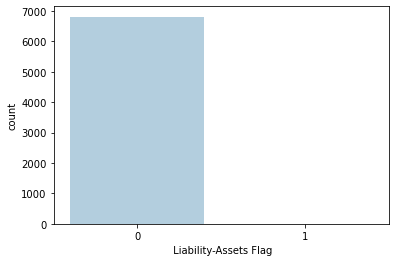

In [110]:
#Liability-Assets Flag
value = randint(0, len(colors)-1)

print(bank_df[' Liability-Assets Flag'].value_counts())
sns.countplot(' Liability-Assets Flag',data=bank_df,palette = colors[value])


- The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0.
- A majority number of times, organizations/company's assets are more than their liabilities.
- Almost all the companies have Liability flag 0, even the bankrupt companies so they do provide any indication for bankruptcy   



 Liability-Assets Flag  Bankrupt?
0                       0            6597
                        1             214
1                       1               6
                        0               2
dtype: int64


<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

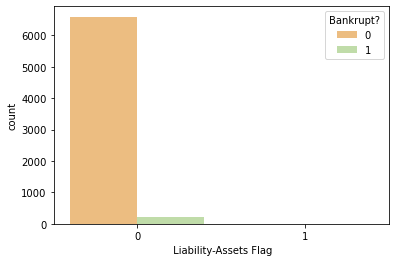

In [113]:
value = randint(0, len(colors)-1)

print(bank_df[[' Liability-Assets Flag','Bankrupt?']].value_counts())
sns.countplot(x = ' Liability-Assets Flag',hue = 'Bankrupt?',data = bank_df,palette = colors[value])

- An organization cannot guarantee not being bankrupt, although owning several assets.
- due to the low number of records for the bankrupt companies there is a very little indication that companies with Liabilities flag 1 are bankrupt 

1    6819
Name:  Net Income Flag, dtype: int64


<AxesSubplot:xlabel=' Net Income Flag', ylabel='count'>

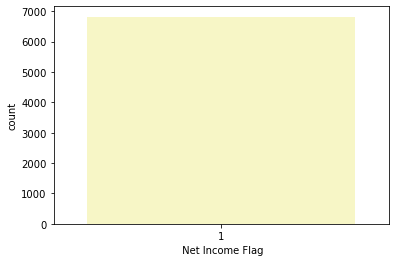

In [118]:
value = randint(0, len(colors)-1)

print(bank_df[' Net Income Flag'].value_counts())
sns.countplot(' Net Income Flag',data=bank_df,palette = colors[value])

- The "Net Income" flag denotes the status of an organization's income in the last two years, where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. We observe that all the records have been exhibiting a loss for the past two years.

 Net Income Flag  Bankrupt?
1                 0            6599
                  1             220
dtype: int64


<AxesSubplot:xlabel=' Net Income Flag', ylabel='count'>

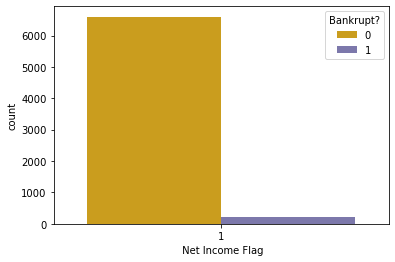

In [119]:
value = randint(0, len(colors)-1)

print(bank_df[[' Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = ' Net Income Flag',hue = 'Bankrupt?',data = bank_df,palette = colors[value])

- The organizations in the dataset are running into losses for the past two years as their net income poses to be negative
- But most of the companies have recovered from the losses thus avoiding bankruptcy
- Very few of the organizations that have had negative income in the past two years suffer from bankruptcy

- Since we  have high number of features we will only select those which are highly correlated to bankruptcy status

## Breaking down the dataframe to top 10 positively correlated variables and 10 negatively correlated variables

In [146]:
positive_corr = bank_df[numeric_feat].corrwith(bank_df["Bankrupt?"]).sort_values(ascending=False)[:10].index.tolist()
negative_corr = bank_df[numeric_feat].corrwith(bank_df["Bankrupt?"]).sort_values()[:10].index.tolist()

In [148]:
positive_corr = bank_df[positive_corr + ["Bankrupt?"]].copy()
negative_corr = bank_df[negative_corr + ["Bankrupt?"]].copy()

In [152]:
positive_corr

,Net Income to Total Assets,Net Income to Stockholder's Equity,ROA(A) before interest and % after tax,Borrowing dependency,ROA(B) before interest and depreciation after tax,Liability to Equity,Debt ratio %,Current Liabilities/Equity,ROA(C) before interest and depreciation before interest,Working Capital/Equity,Bankrupt?
0,2.254317,0.861611,2.045798,0.959784,2.400361,0.680171,1.750845,0.568487,2.217909,1.245334,1
1,0.309033,0.029804,0.311068,0.129305,0.598450,0.240685,1.075727,0.123797,0.673828,0.328953,1
2,0.820510,0.249820,0.908420,0.272560,1.319910,0.679247,1.749724,0.249651,1.303672,0.591934,1
3,1.691222,0.392864,1.636209,0.312459,1.556340,0.093765,0.710131,0.007354,1.735886,0.513105,1
4,0.316008,0.029564,0.307745,0.022791,0.508050,0.128014,0.123674,0.050677,0.661778,0.326867,1
...,...,...,...,...,...,...,...,...,...,...,...
6814,0.194231,0.002968,0.291959,0.051034,0.168181,0.052524,0.212203,0.036776,0.189395,0.077025,0
6815,0.198659,0.006633,0.310237,0.132001,0.477627,0.154404,0.258249,0.122833,0.494676,0.105525,0
6816,0.247517,0.018166,0.379194,0.308082,0.534996,0.316446,1.376904,0.332853,0.534845,0.138379,0
6817,0.100366,0.046934,0.019594,0.307327,0.007403,0.194852,0.485905,0.156907,0.017875,0.076795,0


In [153]:
negative_corr

,Cash Turnover Rate,Total Asset Growth Rate,Inventory Turnover Rate (times),Interest-bearing debt interest rate,Cash Flow to Liability,Cash Flow to Total Assets,Cash/Total Assets,Current Liabilities/Liability,Research and development expense rate,Average Collection Days,Bankrupt?
0,0.685397,0.182259,0.661726,0.151921,0.108218,0.257031,0.861820,0.412896,0.750713,0.038333,1
1,0.006134,0.207732,2.220288,0.151921,0.095129,0.182201,0.783873,2.192039,0.750713,0.038333,1
2,0.582280,0.611527,0.641712,0.151921,0.086679,0.147060,0.884109,1.526996,0.740898,0.038333,1
3,0.150414,0.216772,1.533654,0.151921,0.445261,1.492364,0.755844,0.705262,0.750713,0.038333,1
4,0.560840,0.000657,0.661726,0.151921,0.248437,0.577524,0.789524,1.032643,0.750713,0.038333,1
...,...,...,...,...,...,...,...,...,...,...,...
6814,0.841264,0.539051,0.649317,0.151921,0.107212,0.209512,0.176772,0.122372,0.981322,0.038333,0
6815,1.782606,0.099429,2.398875,0.151921,0.093242,0.161675,0.314257,0.427264,0.196462,0.038333,0
6816,0.841264,0.166317,0.661726,0.151921,0.313441,0.381114,2.074042,1.004708,0.750713,0.038333,0
6817,0.841264,0.601174,0.739253,0.151921,0.316097,0.741549,0.085150,0.636993,0.215378,0.038333,0


In [164]:
def corrboxplot(x_value, y_value):
    
    plt.figure(figsize=(20,15))
    value = randint(0, len(colors)-1)

    for i in range(1,11):
        plt.subplot(4,3,i)  
        sns.boxplot(x = x_value, y = y_value[i-1],data = bank_df,palette = colors[value])

    plt.tight_layout(pad=0.5)

# Positively correlated features to Bankruptcy

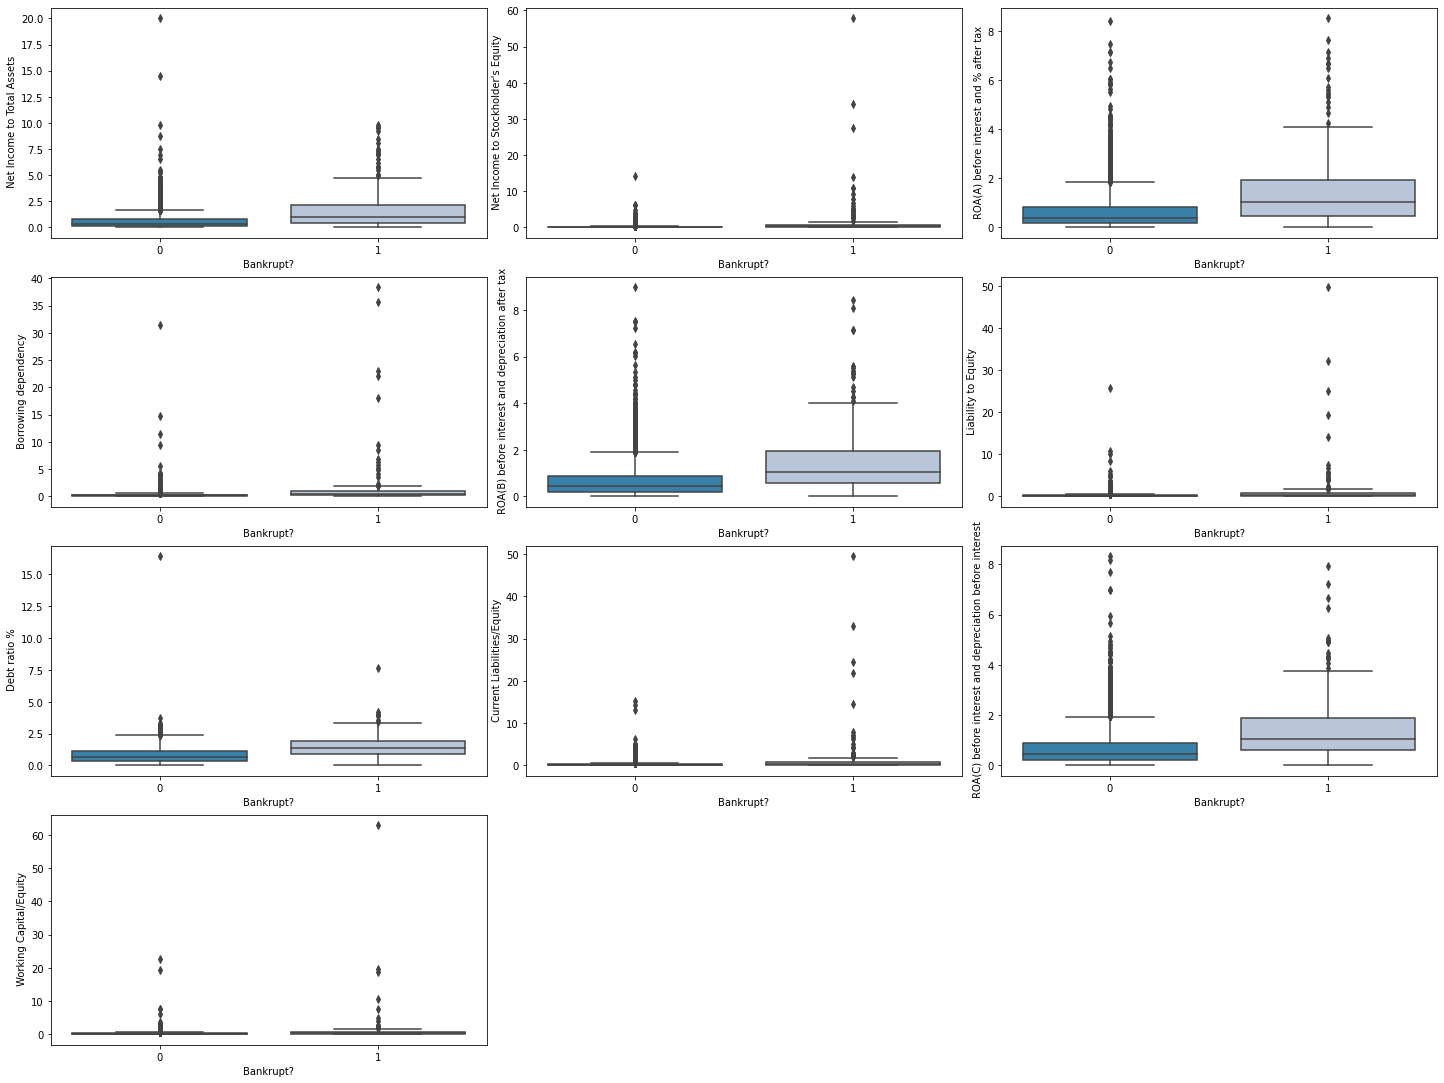

In [191]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrboxplot(x_value, y_value)

- From the above plots we can clearly see bankrupt  company have a higher debt ratio %


## 1 
- Bankrupt companies have a higher net income to total assets ratio 

- A higher ROA means a company is more efficient and productive at managing its balance sheet to generate profits while a lower ROA indicates there is room for improvement.

## 2
- The debt ratio is defined as the ratio of total debt to total assets, expressed as a decimal or percentage. It can be interpreted as the proportion of a company’s assets that are financed by debt
- Bankrupt company have a higher debt ratio

# 3
- Debt-to-equity (D/E) ratio is used to evaluate a company’s financial leverage and is calculated by dividing a company’s total liabilities by its shareholder equity. D/E ratio is an important metric in corporate finance. It is a measure of the degree to which a company is financing its operations with debt rather than its own resources.

- Among similar companies, a higher D/E ratio suggests more risk, while a particularly low one may indicate that a business is not taking advantage of debt financing to expand

- Bankrupt companies have a higher debt to equity ratio i.e, they were relying more on debt financing than using their own resources 

# Working Capital/Equity

(0.0, 3.0)

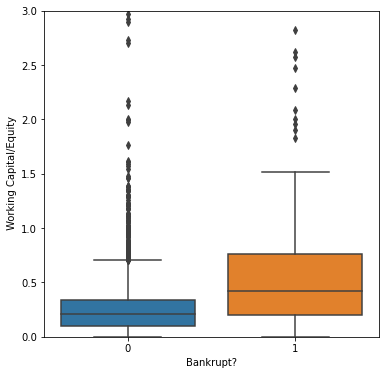

In [200]:
f, axes = plt.subplots(ncols=1, figsize=(6,6))# Persistent EPS in the Last Four Seasons

sns.boxplot(x='Bankrupt?', y=" Working Capital/Equity", data=bank_df)
plt.ylim(0,3)

- Working capital and the working capital ratio are both measurements of a company's current assets as compared to its current liabilities.
- A working capital ratio below one suggests that a company may be unable to pay its short-term debts.
- Conversely, a working capital ratio that is very high suggests that a company is not effectively managing excess cash flow, which could be better directed towards company growth.

Bankrupt companies have a higher working which shows that they were not mananging their cash flow effectively

# Negatively correlated features to Bankruptcy

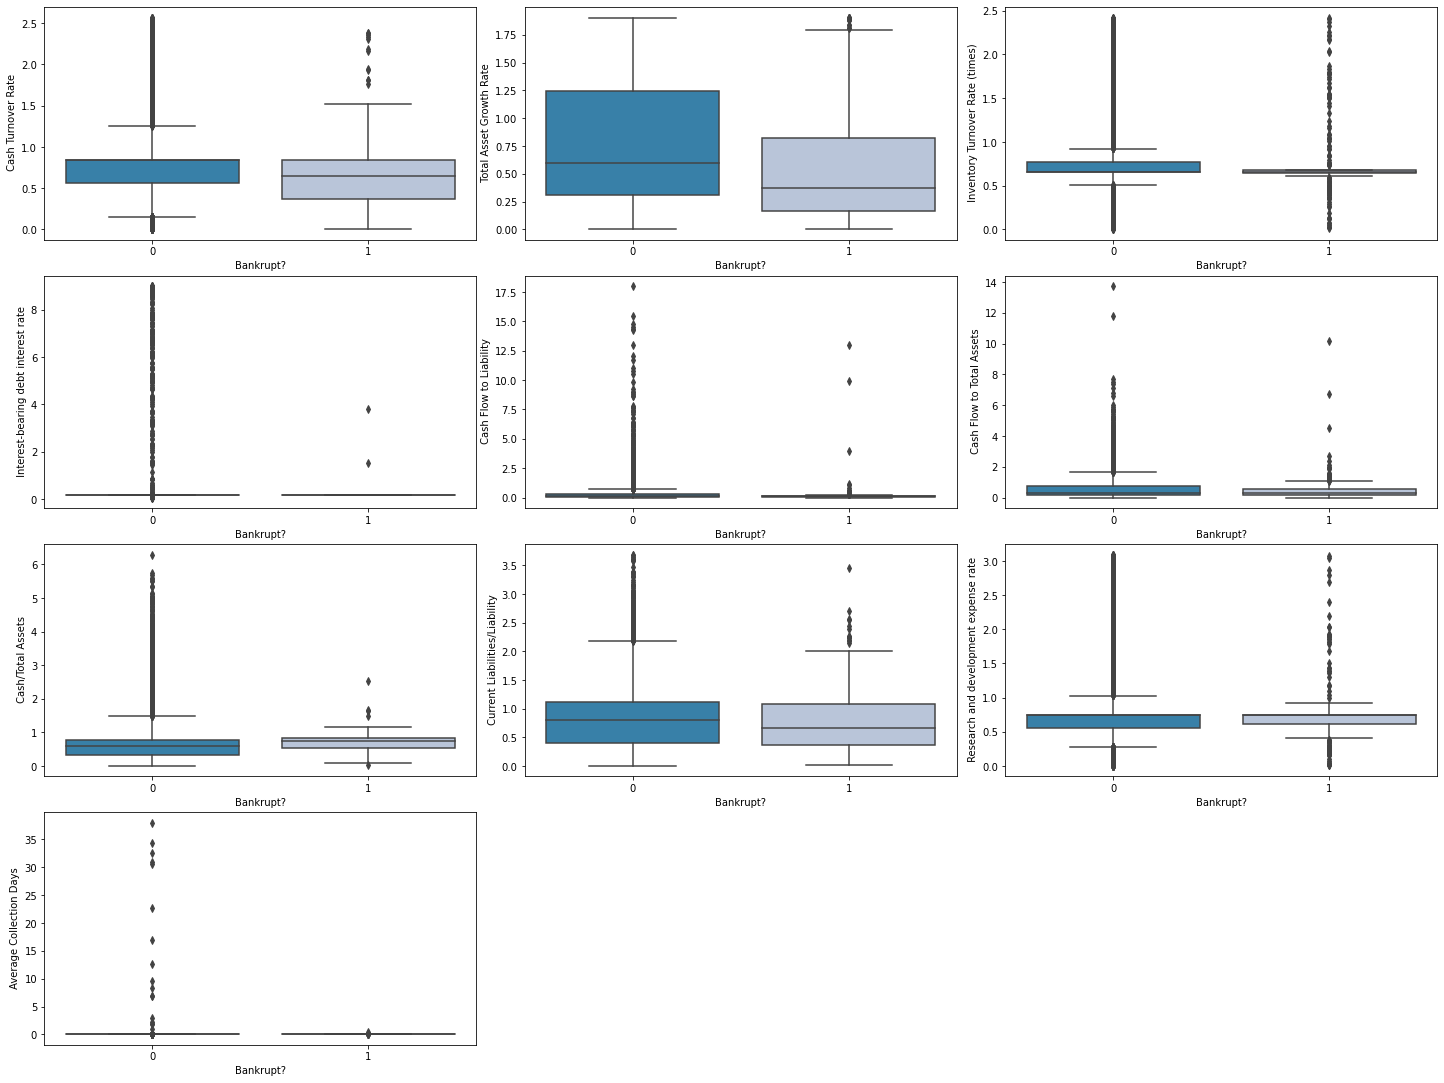

In [166]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrboxplot(x_value, y_value)

## Observations 

## 1

- Bankrupt companies have a lower cash turnover rate 

what is cash turnover rate ?

- A high cash turnover ratio means that the company is turning over its cash quickly, resulting in very efficient cash management. A low cash turnover ratio means that the company is not efficient, and it takes too long before it makes a complete cycle of cash flow in the economy.

## 2

- Bankrupt companies have lower Total assets growth rate

- when there is an increase in total assets in a given period, the liabilities and equity of the company increase by the same amount means that net working capital is also increasing. Net working capital is current assets of a company minus its current liabilities. It deals with a portion of the total assets.

## 3

### cash flow / total assets

- The cash return on assets (cash ROA) ratio is used to benchmark a business's performance with other businesses in the same industry.
- Cash ROA rates actual cash flows to assets without being affected by income.
- The ratio is useful to company analysts or potential and current investors.
- A high cash ROA ratio typically indicates that a company earns more net income from from $1 of assets than the average company, which is a sign of efficiency
 




- A low cash ROA ratio typically indicates that a company makes less net income per $1 of assets, which is a sign of inefficiency.


Bankrupt companies have a lower cashflow flow rate indicating less income

In [170]:
#Plotting features by changing which are not clear 

(0.0, 3.0)

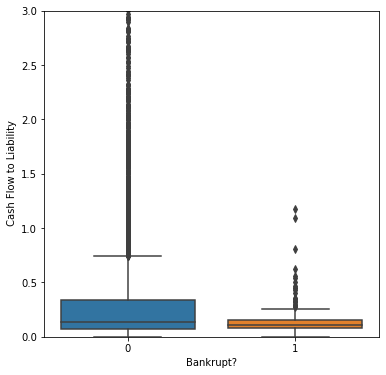

In [169]:
f, axes = plt.subplots(ncols=1, figsize=(6,6))# Persistent EPS in the Last Four Seasons

sns.boxplot(x='Bankrupt?', y=" Cash Flow to Liability", data=bank_df)
plt.ylim(0,3)

- What is cash flow ratio?


The cash flow-to-debt ratio is the ratio of a company's cash flow from operations to its total debt. This ratio is a type of coverage ratio and can be used to determine how long it would take a company to repay its debt if it devoted all of its cash flow to debt repayment

- Bankrupt companies have a lower Cash Flow to liability Ratio
-  A high ratio indicates that a company is better able to pay back its debt, and is thus able to take on more debt if necessary.

(0.0, 3.0)

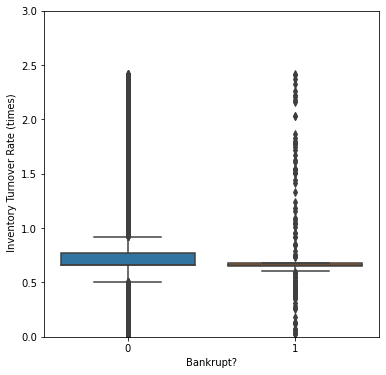

In [176]:
f, axes = plt.subplots(ncols=1, figsize=(6,6))# Persistent EPS in the Last Four Seasons

sns.boxplot(x='Bankrupt?', y=" Inventory Turnover Rate (times)", data=bank_df)
plt.ylim(0,3)

- We can clearly see Bankrupt companies have lower inventory turn ratio indicating their sales were going down during this period

What is inventory turnover ratio ?

- Inventory turnover measures how efficiently a company uses its inventory by dividing the cost of goods sold by the average inventory value during the period.

- A relatively low inventory turnover ratio may be a sign of weak sales or excess inventory, while a higher ratio signals strong sales but may also indicate inadequate inventory stocking.

(0.0, 2.5)

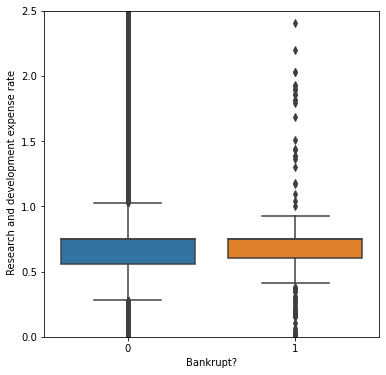

In [179]:
f, axes = plt.subplots(ncols=1, figsize=(6,6))# Persistent EPS in the Last Four Seasons

sns.boxplot(x='Bankrupt?', y=" Research and development expense rate", data=bank_df)
plt.ylim(0,2.5)

Bankrupt companies have slightly a higher research and development expense rate 

In [189]:
bank_df.groupby('Bankrupt?')[' Research and development expense rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,,,,,,,,
0,6599.0,0.822480,0.571992,0.000164,0.561344,0.750713,0.750713,3.090554
1,220.0,0.792404,0.515110,0.007533,0.606034,0.750713,0.750713,3.067461


# Bivariate Analysis 

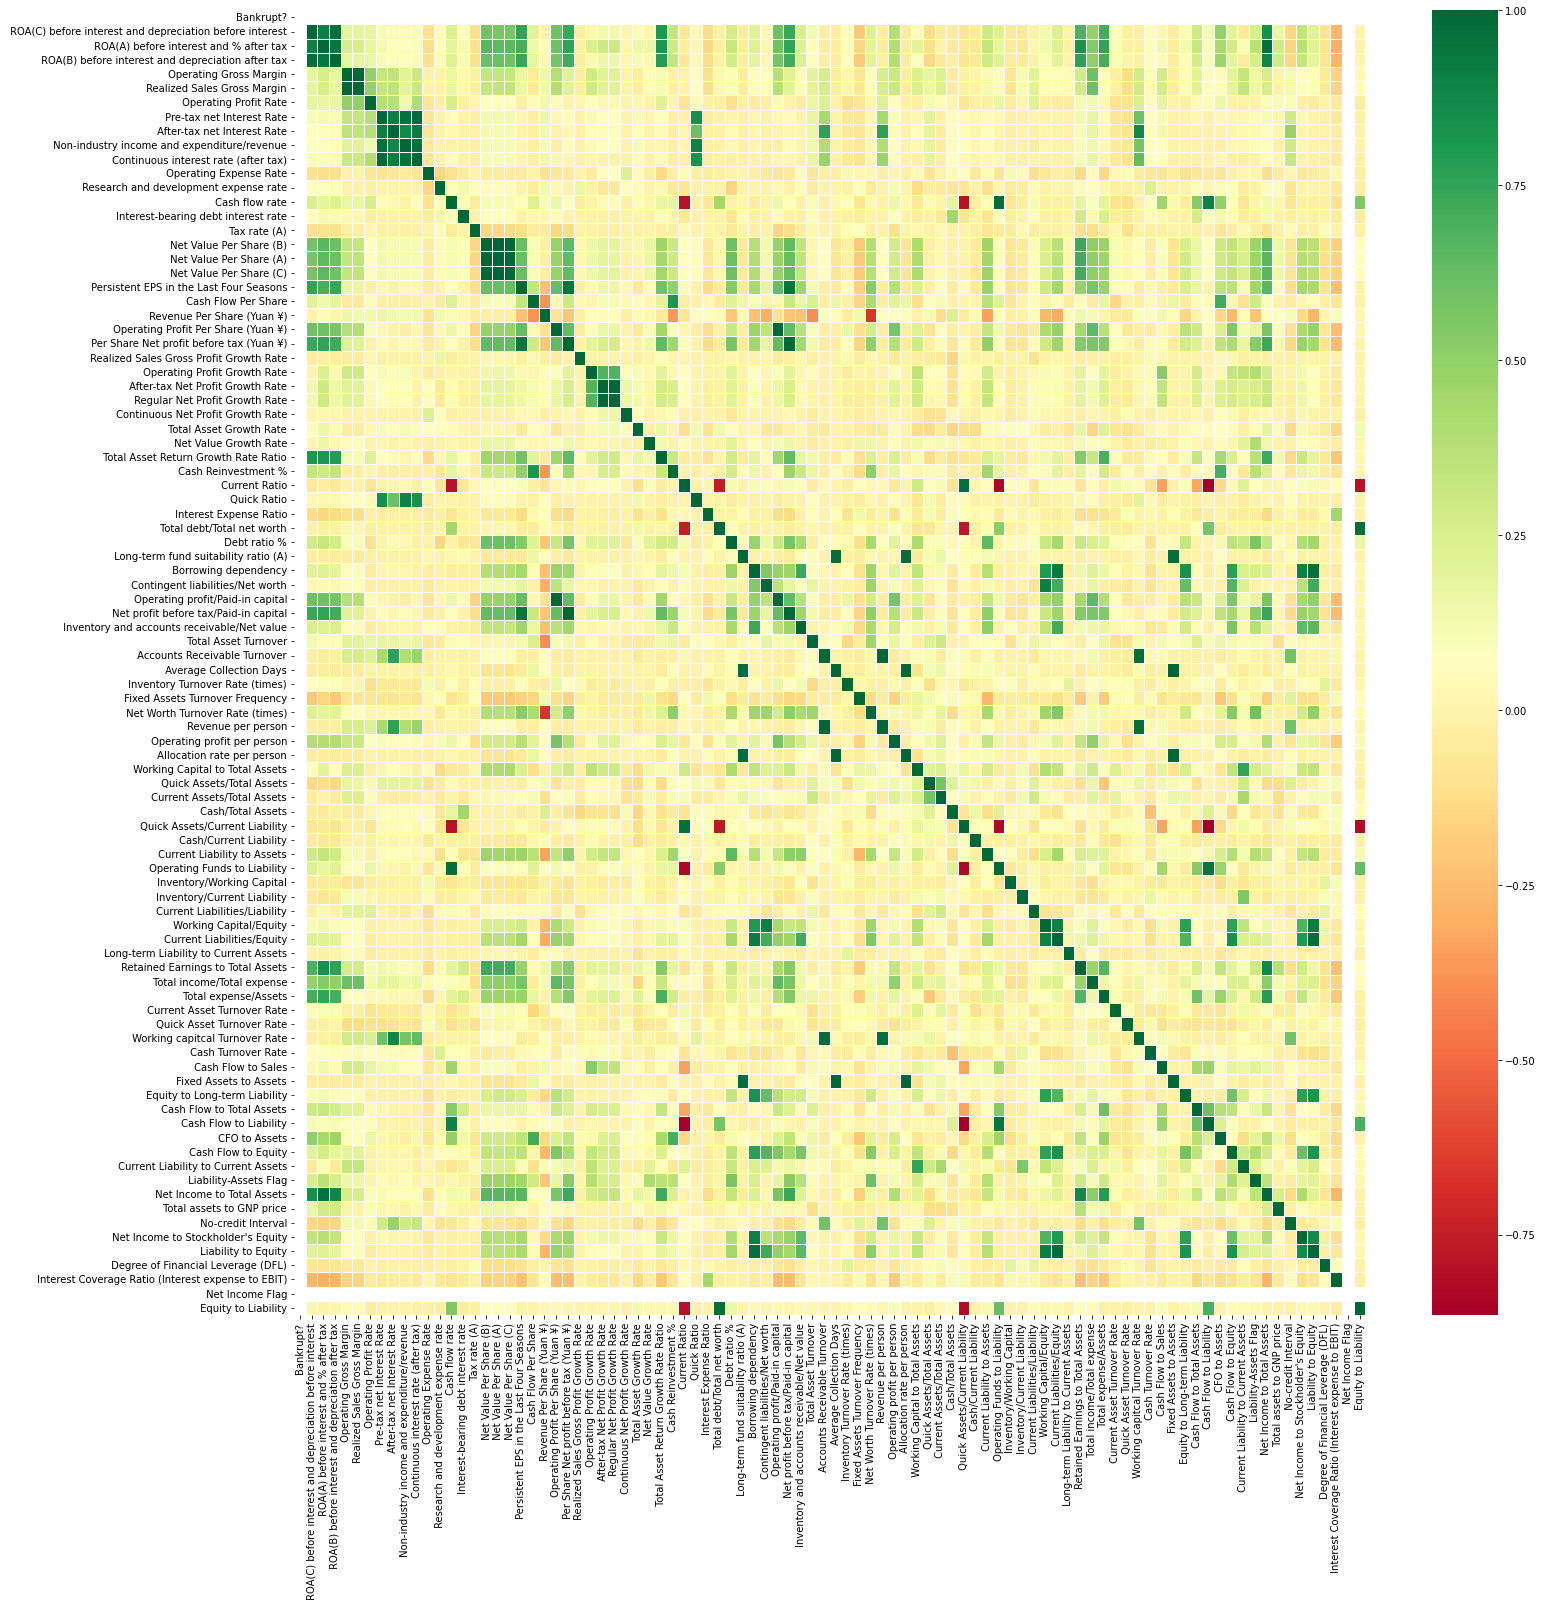

In [201]:
fig = plt.figure(figsize=(24,24))
ax = sns.heatmap(bankrupt_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)
corr_matrix = bankrupt_df.corr()

# Selecting variables which are higly correlated 

In [283]:
# Getting the top 10 positively correlation for the bankrupt data
corr_repayer = bankrupt_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.drop(corr_df_repayer.head(5).index, inplace=True)
pos_corr = corr_df_repayer.head(40)

# Getting the top 10 positively correlation for the bankrupt data


In [292]:

x_value = pos_corr['VAR1'].tolist()
y_value = pos_corr['VAR2'].tolist()


def scatterplot(x_value, y_value):
    
    plt.figure(figsize=(20,22))
    value = randint(0, len(colors)-1)

    for i in range(1,21):
        plt.subplot(7,3,i)  
        sns.scatterplot(x = x_value[i-1], y = y_value[i-1],data = bank_df,palette = colors[value])

    plt.tight_layout(pad=0.5)

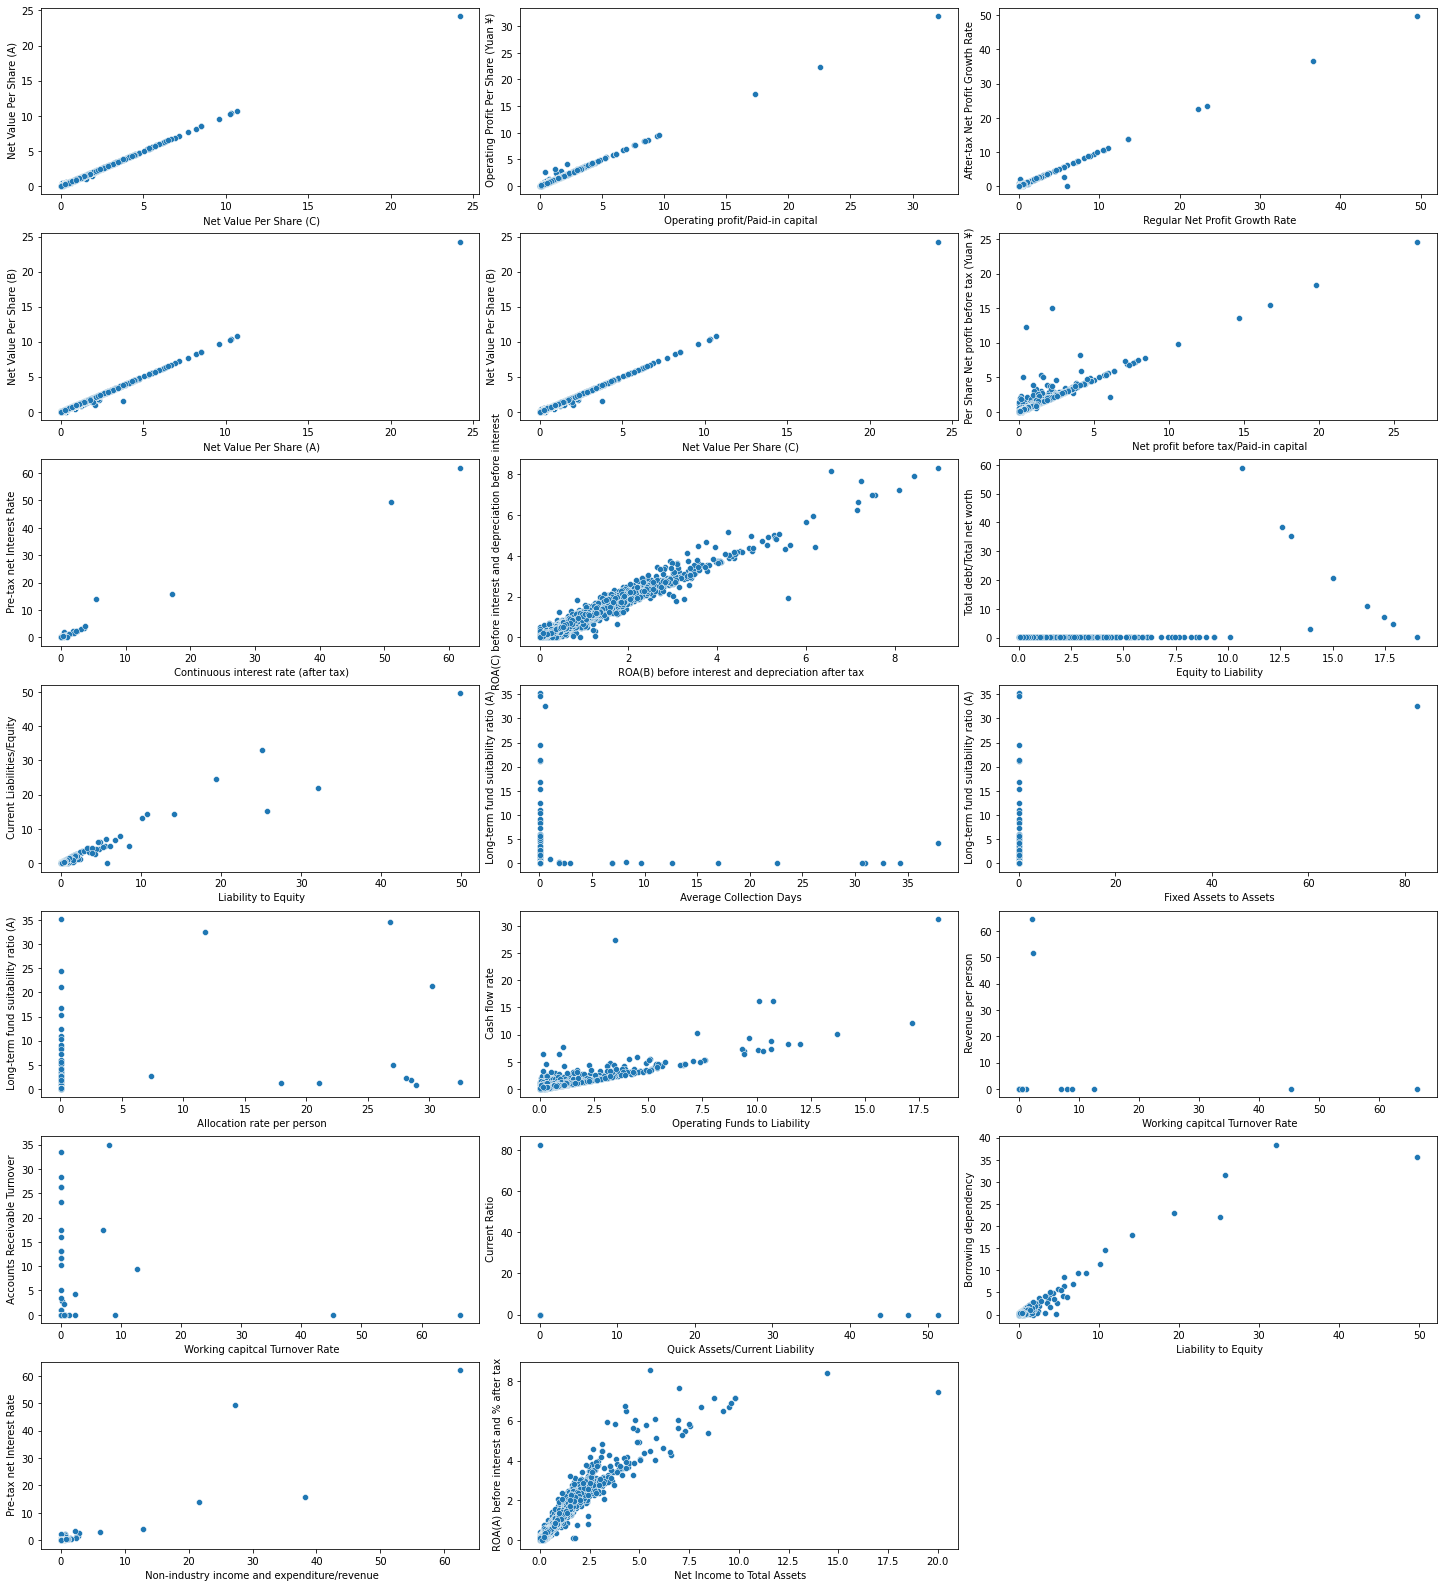

In [293]:
scatterplot(x_value,y_value)

# Plotting Features which are higly negatively  correlated 

In [294]:
corr_repayer = bankrupt_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
neg_corr = corr_df_repayer.tail(15)

In [295]:

x_value = neg_corr['VAR1'].tolist()
y_value = neg_corr['VAR2'].tolist()


def scatterplot(x_value, y_value):
    
    plt.figure(figsize=(20,22))
    value = randint(0, len(colors)-1)

    for i in range(1,15):
        plt.subplot(5,3,i)  
        sns.scatterplot(x = x_value[i-1], y = y_value[i-1],data = bank_df,palette = colors[value])

    plt.tight_layout(pad=0.5)

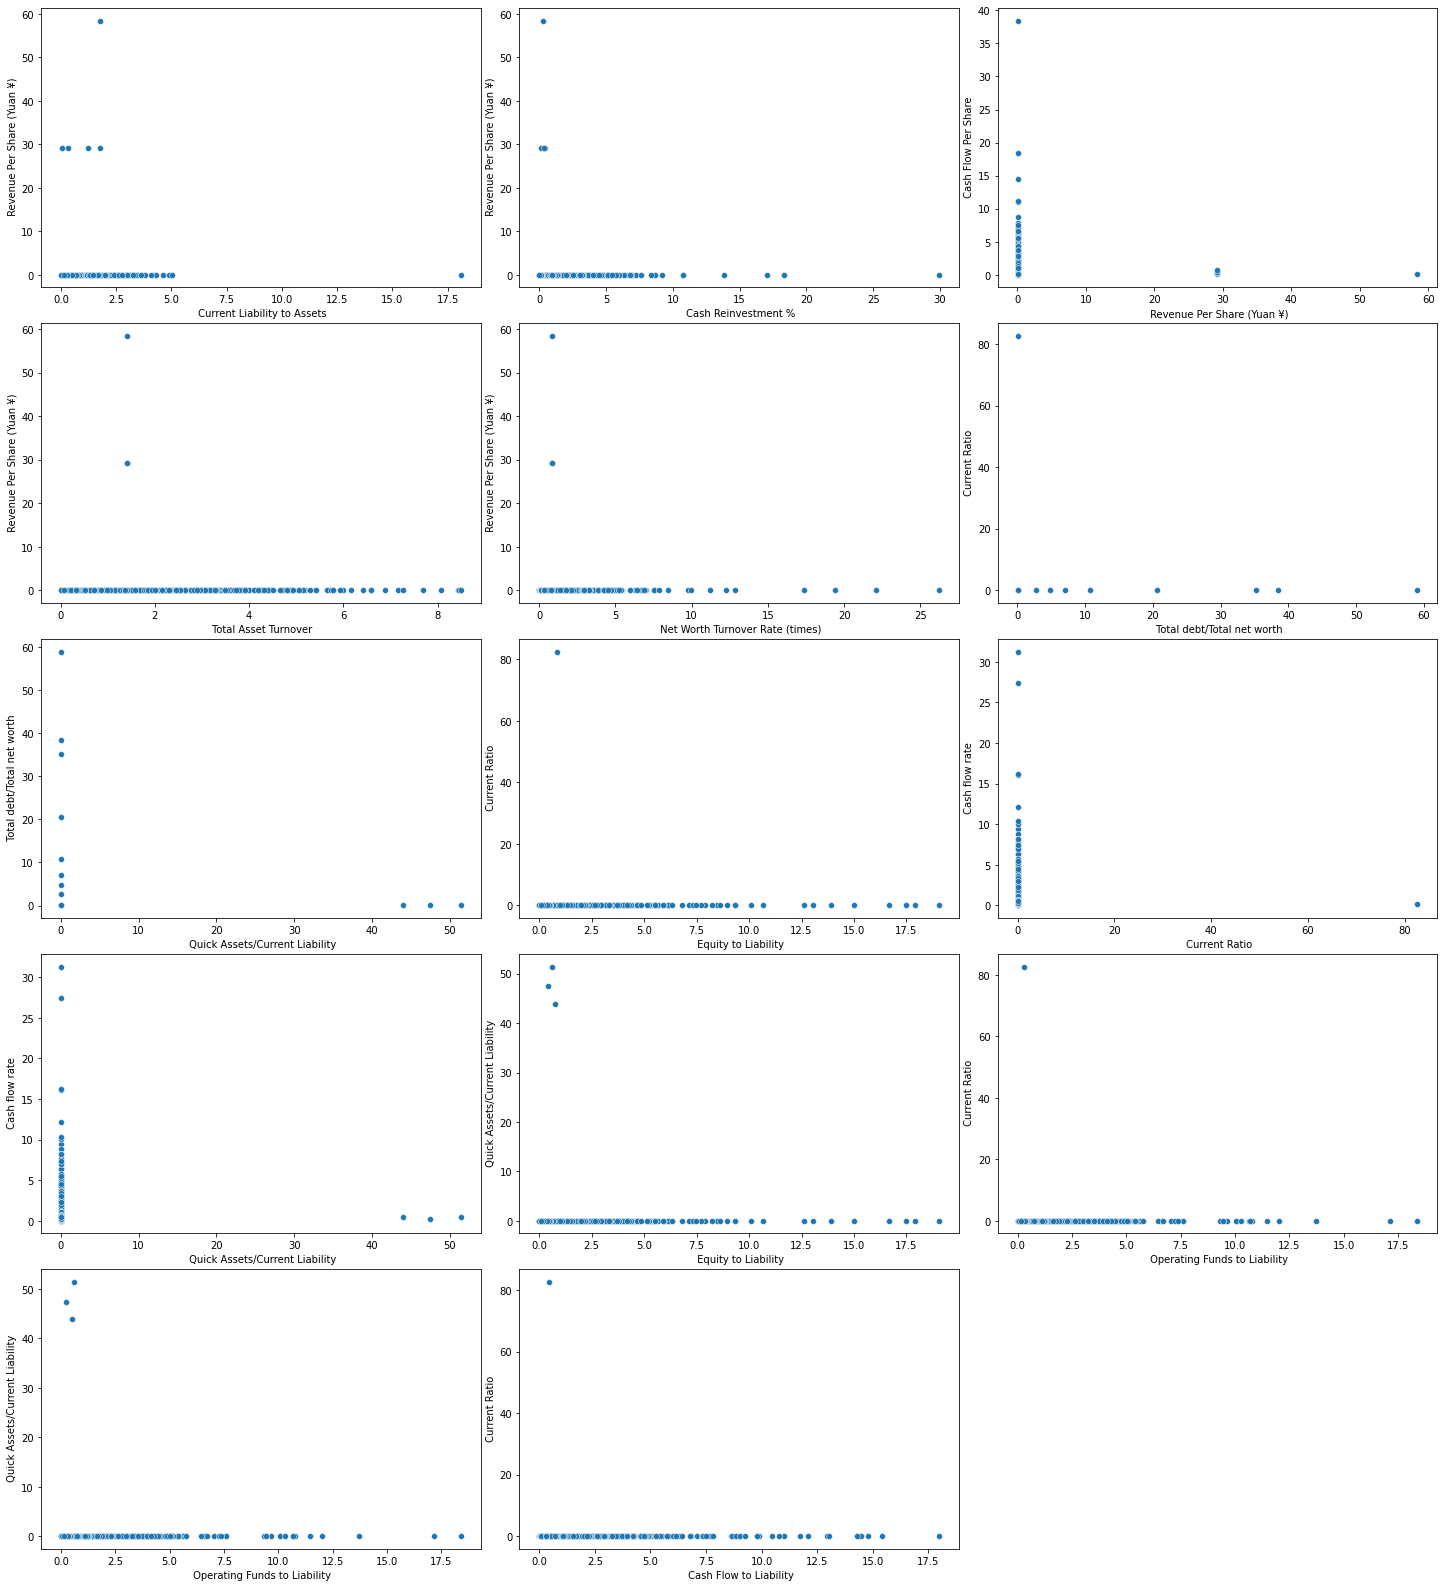

In [296]:
scatterplot(x_value,y_value)